## Introduction

In this notebook, I present three visual comparisons of the support Yamandú Orsi received from different age groups in Uruguay. Specifically, I focus on how new voters—defined here as individuals who did not vote in the previous elections—cast their ballots compared to various older cohorts. The analysis compares Orsi’s vote share among new voters versus :

- People older than 43 years old (in Canelones and Montevideo),
- People older than 58 years old (in all departments except Montevideo),
- The oldest voters within each serie (precinct code).

By creating these three graphs, I illustrate how Orsi’s performance differed across age segments. As the results will show, regardless of which metric we use for defining older voters, and in almost every city examined, younger voters consistently gave Orsi a higher percentage of the vote than their older counterparts. This finding underscores the generational aspect of his support base and provides insight into electoral dynamics across Uruguay’s departments.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Pre-processing steps

In [2]:
df_19=pd.read_csv('data/series2019.csv')

In [3]:
# Set the folder path where the .xlsx files are located
folder_path = "data/2019"

# Initialize an empty DataFrame to append all the data
df4 = pd.DataFrame()

# Loop over all .xlsx files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".xlsx") or file.endswith(".xls"):
        file_path = os.path.join(folder_path, file)
        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)
        # Append the data to the combined DataFrame
        df4 = pd.concat([df4, df], ignore_index=True)
df_19=df4[['Serie','Desde', 'Hasta', 'Circuito']]
df_19_max=df_19.groupby('Serie').max()[['Circuito', 'Hasta']].reset_index()
df_19_max=df_19_max.rename(columns={'Hasta':'max'})

In [4]:
df_24=pd.read_csv('data/series2024.csv')

In [5]:
# Defining series that existed in 2004
cred_2004=pd.read_csv('data/credenciales2004.csv')
series_2004=cred_2004[~(cred_2004['Circuito2004'].isna())  ].groupby('Serie').first().reset_index('Serie')['Serie'].to_list()
series_con_nuevos=pd.read_csv('data/series_con_nuevos.csv')

In [6]:
# defining variables for each electoral precint
circuitos=pd.merge(df_24, df_19_max, left_on='SERIE',right_on='Serie', how='inner') #inner porque solo quiero series que esten antes y dps
circuitos['hay_nuevo']=circuitos['DESDE']>circuitos['max']
circuitos=pd.merge(circuitos,circuitos[['SERIE','hay_nuevo']].groupby('SERIE').max().rename(columns={'hay_nuevo':'hay_nuevo_serie'}).reset_index(), on='SERIE')
circuitos=pd.merge(circuitos, series_con_nuevos, left_on='SERIE',right_on='SERIE', how='left')
circuitos['mas_de_58']=circuitos['HASTA']<circuitos['1984']
circuitos['mas_de_43']=circuitos['HASTA']<circuitos['1999']
ultimos=circuitos.groupby('SERIE').last()[['CIRCUITO', 'Serie', 'hay_nuevo_serie']]
ultimos=ultimos[(ultimos['hay_nuevo_serie']==True) &( ultimos['Serie'].isin(series_2004) )]
primeros=circuitos.groupby('SERIE').first()[['LOCALIDAD','CIRCUITO', 'Serie', 'hay_nuevo_serie']]
primeros=primeros[(primeros['hay_nuevo_serie']==True) & ( primeros['Serie'].isin(series_2004))]
mas_de_58=circuitos[(circuitos['mas_de_58']==True)]
mas_de_43=circuitos[(circuitos['mas_de_43']==True)]
nuevos=circuitos[(circuitos['hay_nuevo']==True) & (circuitos['Serie'].isin(series_2004))]
nuevos_58=pd.merge(nuevos, circuitos[(circuitos['mas_de_58']==True)].groupby('SERIE').max().reset_index()[['SERIE']], on='SERIE', how='right')
nuevos_43=pd.merge(nuevos, circuitos[(circuitos['mas_de_43']==True)].groupby('SERIE').max().reset_index()[['SERIE']], on='SERIE', how='right')

C:\Users\guill\AppData\Local\Temp\ipykernel_48464\3012540090.py:15: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  nuevos_58=pd.merge(nuevos, circuitos[(circuitos['mas_de_58']==True)].groupby('SERIE').max().reset_index()[['SERIE']], on='SERIE', how='right')


In [7]:
df5=pd.read_excel('data\Primario Balotaje Circuito.xls', header=8)
base=pd.merge(df5, mas_de_58, on=['SERIE','CIRCUITO'])[['DEPTO','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
base_deptos=base.groupby('DEPTO').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
deptos_mas_de_58=base_deptos.sort_values(by='prop')

In [8]:
base=pd.merge(df5, mas_de_43, on=['SERIE','CIRCUITO'])[['DEPTO','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
base_deptos=base.groupby('DEPTO').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
deptos_mas_de_43=base_deptos.sort_values(by='prop')

In [9]:
base=pd.merge(df5, nuevos, on=['SERIE','CIRCUITO'])[['DEPTO','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
base_deptos=base.groupby('DEPTO').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
deptos_nuevos=base_deptos.sort_values(by='prop')

In [10]:
base=pd.merge(df5, primeros, on=['SERIE','CIRCUITO'])[['DEPTO','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
base_deptos=base.groupby('DEPTO').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
deptos_viejos=base_deptos.sort_values(by='prop')

In [11]:
# Complete municipio mapping 
municipio_mapping = {

    # General Municipalities
    "Municipio A": ["BSA", "BTA", "BTB", "BTC", "BTD", "BUA", "BUB", "BVA", "BVB", "BVC", "BXA", "BXB", "BXC", "BSB"],
    "Municipio B": [
        "AAA", "ACA", "AIA", "AKA", "AMA", "APA", "ARA", "ASA", "ATA", "AVA", "BEA", "BFA", "BJB", "BKB", 
        "AAB", "ABA", "ABB", "ACB", "ADA", "ADB", "AEA", "AEB", "AFA", "AFB", "AGA", "AGB", "AHA", "AHB", 
        "AIB", "AJA", "AJB", "AKB", "ALA", "ALB", "AMB", "ANA", "ANB", "AOA", "AOB", "APB", "AQA", "AQB", 
        "ARB", "ASB", "AVB", "BEB", "BFB"
    ],
    "Municipio C": [
        "BGA", "BJA", "BKA", "BLA", "BLB", "BMA", "BMB", "BNA", "BPA", "BPB", "BQA", "BQB",
        "BGB", "BHA", "BIA", "BIB", "BHB"
    ],
    "Municipio CH": ["ATB", "AUA", "AUB", "AXA", "AXB", "AZA", "AZB", "BAA", "BAB"],
    "Municipio D": ["BBA", "BBB", "BBC", "BBD", "BDD", "BNB", "BNC", "BOA", "BOB"],
    "Municipio E": ["BCA", "BCB", "BCC", "BCD", "BCE", "BCF", "BCG"],
    "Municipio F": ["BDA", "BDB", "BDC", "BDE", "BDF"],
    "Municipio G": ["BRA", "BRB", "BRC", "BZA", "BZB", "BZC"],
    # Canelones
    "Ciudad de la Costa": ["CMF", "CMI", "CMJ"],
    "Las Piedras": ["CDA", "CDD", "CDE"],
    "Pando": ["CMA"],
    "La Paz": ["CEA"],
    "Canelones": ["CAA", "CNA"],
    "Santa Lucía": ["CBA", "CBB", "CBC"],
    "Progreso": ["CDB"],
    "Paso Carrasco": ["CMD"],
    "Barros Blancos": ["CME"],
    "Colonia Nicolich": ["CMK"],
    "San Ramón": ["CIA"],
    "Salinas": ["CMG"],
    "Suárez": ["CQA", "CQC"],
    "Parque del Plata": ["CMH"],
    "Sauce": ["CFA"],
    "Tala": ["CJA", "CJB"],
    "Atlántida": ["CMC"],
    "Toledo": ["CQB"],
    "Empalme Olmos": ["CMB"],
    "San Jacinto": ["CHA"],
    "Santa Rosa": ["CGA"],
    "La Floresta": ["CLB", "CLC"],
    "Migues": ["CKA"],
    "Los Cerrillos": ["CCA", "CEB"],
    "San Bautista": ["CPA"],
    "Soca": ["CLA", "CLD", "CLE"],
    "Montes": ["CKB"],
    "San Antonio": ["COA"],
    "Aguas Corrientes": ["CCB"],
    "18 de Mayo": ["CDC"],
    # Maldonado
    "Maldonado": ["DAA", "DAC", "DAE", "DAF", "DAG", "DAH", "DAI", "DAJ", "DAD"],
    "San Carlos": ["DBA", "DBB", "DBC", "DDA", "DDB", "DDC", "DED", "DEE", "DEF", "DBD", "DBE", "DBF", "DBG", "DEH"],
    "Piriápolis": ["DCB"],
    "Punta del Este": ["DAB", "DAK"],
    "Pan de Azúcar": ["DCA", "DCC"],
    "Aiguá": ["DDD", "DFA", "DFB"],
    "Solís Grande": ["DCD", "DCE", "DCF"],
    "Garzón": ["DEA", "DEC", "DEB", "DEG"],
    # Rocha
    "Chuy": ["EFB"],
    "Castillos": ["EDC", "ECB"],
    "Lascano": ["EEA"],
    "La Paloma": ["ECG"],
    # Treinta y Tres
    "Vergara": ["FBA"],
    "Santa Clara de Olimar": ["FDA"],
    "Cerro Chato": ["FDB"],
    "General Enrique Martínez": ["FBC"],
    "Villa Sara": ["FEA"],
    "Rincón": ["FBE"],
    # Cerro Largo
    "Río Branco": ["GDA", "GDB", "GDC", "GDD", "GDH"],
    "Fraile Muerto": ["GFB"],
    "Isidoro Noblía": ["GEC", "GED", "GEF"],
    "Aceguá": ["GEE"],
    "Tupambaé": ["GGA", "GGC"],
    "Plácido Rosas": ["GCA"],
    "Arévalo": ["GGD", "GGE", "GGF", "GGG", "GGH"],
    "Arbolito": ["GCC", "GCE"],
    "Ramón Trigo": ["GFD"],
    "Bañado de Medina": ["GFE"],
    "Las Cañas": ["GCF", "GDE", "GDG"],
    "Cerro de las Cuentas": ["GCD", "GFC"],
    "Centurión": ["GDF", "GEA"],
    "Tres Islas": ["GFA"],
    "Quebracho": ["GGB"],
    # Rivera
    "Tranqueras": ["HCC", "HCD", "HCG"],
    "Vichadero": ["HFG"],
    "Minas de Corrales": ["HDB"],
    # Artigas
    "Bella Unión": ["ICD", "ICE", "ICF"],
    "Tomás Gomensoro": ["ICC"],
    "Baltasar Brum": ["ICA"],
    # Salto
    "Villa Constitución": ["JDB", "JDC", "JDD"],
    "Pueblo Belén": ["JDE"],
    "Pueblo Rincón de Valentín": ["JEC"],
    "Colonia Lavalleja": ["JEA", "JEB"],
    "Pueblo San Antonio": ["JCA"],
    "Mataojo": ["JFD", "JFE", "JFF", "JFG"],
    # Paysandú
    "Guichón": ["KEA", "KEB", "KEC", "KED"],
    "Quebracho": ["KFA", "KFC"],
    "Porvenir": ["KCD", "KCE", "KDA", "KDB", "KDD", "KDE"],
    "Piedras Coloradas": ["KGA", "KGB"],
    "Lorenzo Geyres": ["KGC", "KFB"],
    "Tambores": ["KHA", "KHB", "KEE", "KEF"],
    "Chapicuy": ["KID", "KIE"],
    # Río Negro
    "Young": ["LBC", "LBD"],
    "Nuevo Berlín": ["LAB"],
    "San Javier": ["LBA"],
    # Soriano
    "Dolores": ["MCA", "MCB"],
    "Cardona": ["MFA"],
    "José Enrique Rodó": ["MEE", "MFC"],
    "Palmitas": ["MGJ"],
    # Colonia
    "Carmelo": ["NHB"],
    "Juan L. Lacaze": ["NLB", "NLC"],
    "Nueva Helvecia": ["NEB"],
    "Rosario": ["NCB"],
    "Nueva Palmira": ["NIB"],
    "Tarariras": ["NBD"],
    "Ombúes de Lavalle": ["NGA", "NGB"],
    "Colonia Valdense": ["NDB"],
    "Florencio Sánchez": ["NFC"],
    "Colonia Miguelete": ["NBB", "NBC"],
    "La Paz (Colonia)": ["NDA"],
    # San José
    "Ciudad del Plata": ["OEI", "OGA", "OGB", "OGC", "OGD", "OGE"],
    "Libertad": ["OEA", "OEB", "OEH"],
    "Rodríguez": ["OCH", "ODA", "ODB", "ODC", "ODE", "ODF", "ODG"],
 "Ecilda Paullier": ["OFE", "OFF", "OFG"],
    # Flores
    "Ismael Cortinas": ["PBD"],
    # Florida
    "Sarandí Grande": ["QCA"],
    "Casupá": ["QDC"],
    "Fray Marcos": ["QDD"],
    # Durazno
    "Sarandí del Yí": ["RDC", "RDD", "RDE"],
    "Villa del Carmen": ["RCC", "RCD"],
    # Lavalleja
    "José Pedro Varela": ["SHD"],
    "Solís de Mataojo": ["SCC"],
    "José Batlle y Ordóñez": ["SIE"],
    "Mariscala": ["SGC"],
    # Tacuarembó
    "Paso de los Toros": ["TFD"],
    "San Gregorio de Polanco": ["TED"],
    "Ansina": ["TBE"]
}

# Function to assign municipio based on SERIE
def assign_municipio(serie):
    for municipio, series in municipio_mapping.items():
        if serie in series:
            return municipio
    return 'Unknown'

df11=pd.merge(df5, primeros, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)

capitales_departamentales = [
    "ARTIGAS", "MELO", "COLONIA DEL SACRAMENTO", "DURAZNO", 
    "TRINIDAD", "FLORIDA", "MINAS", "MALDONADO", "PAYSANDÚ", 
    "FRAY BENTOS", "RIVERA", "ROCHA", "SALTO", "SAN JOSÉ DE MAYO", 
    "MERCEDES", "TACUAREMBÓ", "TREINTA Y TRES"
]

def assign_capital(serie):
    if serie in capitales_departamentales:
        return serie

df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']

base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_viejos=base_deptos.sort_values(by='prop')

C:\Users\guill\AppData\Local\Temp\ipykernel_48464\1242306641.py:182: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


# Creating datasets for the graphs

In [12]:
df11=pd.merge(df5, nuevos, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)
df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']
base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_nuevos=base_deptos.sort_values(by='prop')

C:\Users\guill\AppData\Local\Temp\ipykernel_48464\1436660415.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


In [13]:
df11=pd.merge(df5, mas_de_58, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)
df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']
base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_mas_de_58=base_deptos.sort_values(by='prop')

C:\Users\guill\AppData\Local\Temp\ipykernel_48464\1675883960.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


In [14]:
df11=pd.merge(df5, mas_de_43, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)
df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']
base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_mas_de_43=base_deptos.sort_values(by='prop')

C:\Users\guill\AppData\Local\Temp\ipykernel_48464\4126008276.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


In [15]:
# Define the municipios grouped by their respective departments
municipios_canelones = [
    "Ciudad de la Costa", "Las Piedras", "Pando", "La Paz", "Canelones", "Santa Lucía", "Progreso",
    "Paso Carrasco", "Barros Blancos", "Colonia Nicolich", "San Ramón", "Salinas", "Suárez",
    "Parque del Plata", "Sauce", "Tala", "Atlántida", "Toledo", "Empalme Olmos", "San Jacinto",
    "Santa Rosa", "La Floresta", "Migues", "Los Cerrillos", "San Bautista", "Soca", "Montes",
    "San Antonio", "Aguas Corrientes", "18 de Mayo"
]

municipios_montevideo = [
    "Municipio A", "Municipio B", "Municipio C", "Municipio CH", 
    "Municipio D", "Municipio E", "Municipio F", "Municipio G"
]

In [16]:
munis_to_graph=pd.merge(muni_viejos, muni_nuevos, on='municipio').reset_index()
munis_to_graph['tipo']='municipio'
munis_to_graph.loc[munis_to_graph['municipio'].isin(municipios_canelones), 'tipo']='municipios canelones'
munis_to_graph.loc[munis_to_graph['municipio'].isin(municipios_montevideo), 'tipo']='municipios montevideo'
munis_to_graph.loc[munis_to_graph['municipio'].isin(capitales_departamentales), 'tipo']='Capital'
deptos_to_graph=pd.merge(deptos_viejos, deptos_nuevos, on='DEPTO').reset_index()
deptos_to_graph['tipo']='departamento'
df_to_graph_1=pd.concat([munis_to_graph,deptos_to_graph])

# New voters vs. Oldest voters of the series

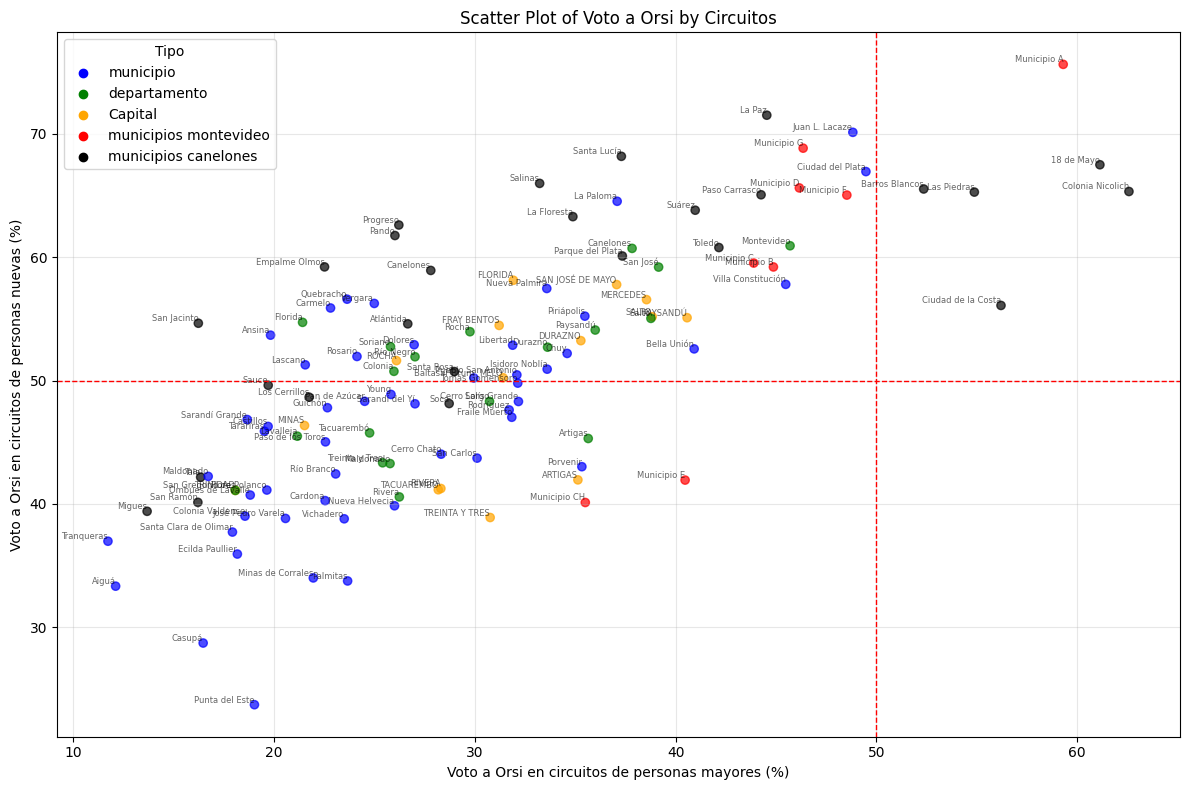

In [17]:

df = df_to_graph_1

# Use a specific color map for the 'tipo' variable
tipo_colors = {"municipio": "blue", "departamento": "green", "Capital": "orange", 'municipios montevideo': "red", 'municipios canelones': "black"}
df["color"] = df["tipo"].map(tipo_colors)

# Multiply props by 100 to convert to percentages
df["prop_x"] *= 100
df["prop_y"] *= 100

# Set labels for text annotations
df["label"] = df["municipio"].fillna(df["DEPTO"])

# Scatter plot with additional vertical and horizontal lines
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df["prop_x"], df["prop_y"], c=df["color"], alpha=0.7)

# Add text annotations
for i, row in df.iterrows():
    plt.text(row["prop_x"], row["prop_y"], str(row["label"]), fontsize=6, ha='right', va='bottom', alpha=0.6)

# Draw vertical and horizontal lines at 50
plt.axvline(x=50, color='red', linestyle='--', linewidth=1)
plt.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Customize axes
plt.xlabel("Voto a Orsi en circuitos de personas mayores (%)")
plt.ylabel("Voto a Orsi en circuitos de personas nuevas (%)")
plt.title("Scatter Plot of Voto a Orsi by Circuitos")

# Add a manual legend to match colors with 'tipo'
for tipo, color in tipo_colors.items():
    plt.scatter([], [], color=color, label=tipo)
plt.legend(title="Tipo", loc="best")

# Show plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("output/1.png", dpi=300)

plt.show()


In [18]:
df11=pd.merge(df5, nuevos_58, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)

df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']

base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_nuevos_58=base_deptos.sort_values(by='prop')


C:\Users\guill\AppData\Local\Temp\ipykernel_48464\3085426333.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


In [19]:
munis_to_graph=pd.merge(muni_mas_de_58, muni_nuevos_58, on='municipio').reset_index()
munis_to_graph['tipo']='municipio'
munis_to_graph.loc[munis_to_graph['municipio'].isin(municipios_canelones), 'tipo']='municipios canelones'


munis_to_graph.loc[munis_to_graph['municipio'].isin(capitales_departamentales), 'tipo']='Capital'
deptos_to_graph=pd.merge(deptos_mas_de_58, deptos_nuevos, on='DEPTO').reset_index()
deptos_to_graph['tipo']='departamento'
df_to_graph_2=pd.concat([munis_to_graph,deptos_to_graph])

# New voters vs. Voters older than 58 years old

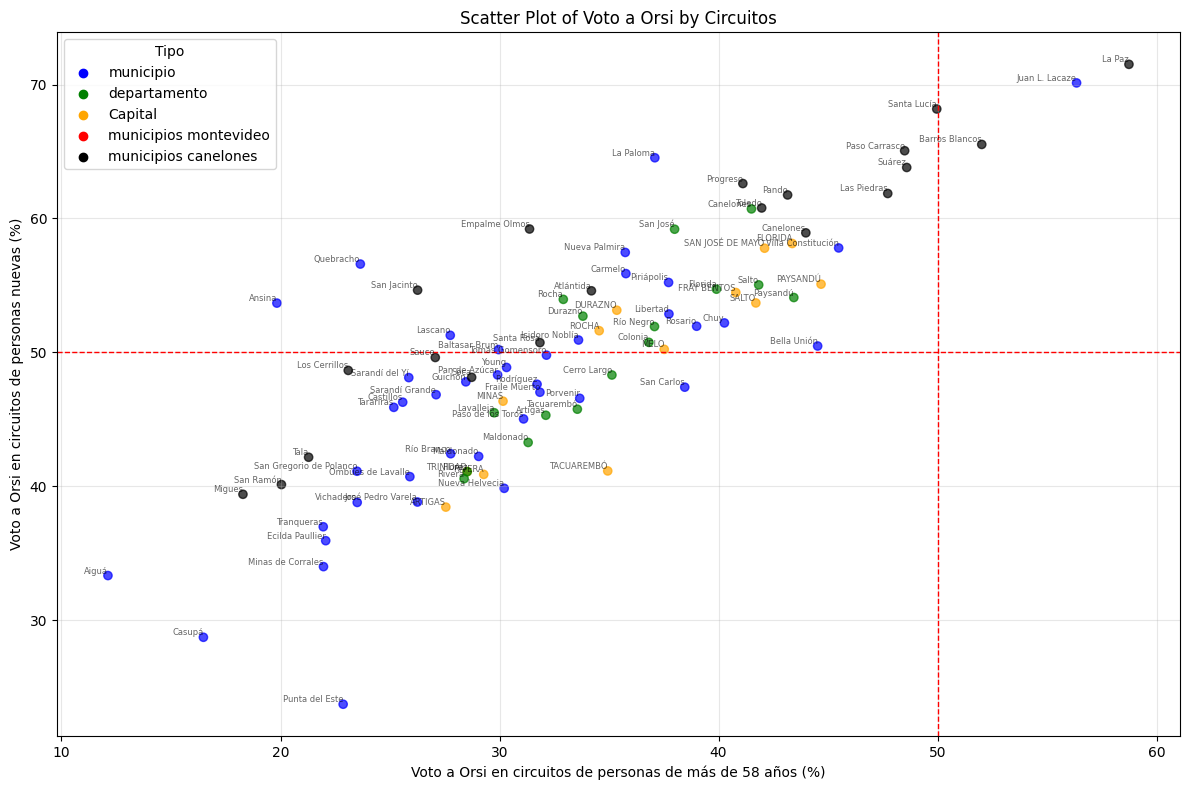

In [20]:
df = df_to_graph_2

# Use a specific color map for the 'tipo' variable
tipo_colors = {"municipio": "blue", "departamento": "green", "Capital": "orange", 'municipios montevideo': "red", 'municipios canelones': "black"}
df["color"] = df["tipo"].map(tipo_colors)

# Multiply props by 100 to convert to percentages
df["prop_x"] *= 100
df["prop_y"] *= 100

# Set labels for text annotations
df["label"] = df["municipio"].fillna(df["DEPTO"])

# Scatter plot with additional vertical and horizontal lines
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df["prop_x"], df["prop_y"], c=df["color"], alpha=0.7)

# Add text annotations
for i, row in df.iterrows():
    plt.text(row["prop_x"], row["prop_y"], str(row["label"]), fontsize=6, ha='right', va='bottom', alpha=0.6)

# Draw vertical and horizontal lines at 50
plt.axvline(x=50, color='red', linestyle='--', linewidth=1)
plt.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Customize axes
plt.xlabel("Voto a Orsi en circuitos de personas de más de 58 años (%)")
plt.ylabel("Voto a Orsi en circuitos de personas nuevas (%)")
plt.title("Scatter Plot of Voto a Orsi by Circuitos")

# Add a manual legend to match colors with 'tipo'
for tipo, color in tipo_colors.items():
    plt.scatter([], [], color=color, label=tipo)
plt.legend(title="Tipo", loc="best")

# Show plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("output/2.png", dpi=300)

plt.show()


In [21]:
df11=pd.merge(df5, nuevos_43, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)

df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']

base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_nuevos_43=base_deptos.sort_values(by='prop')


C:\Users\guill\AppData\Local\Temp\ipykernel_48464\3025921766.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


In [22]:
munis_to_graph=pd.merge(muni_mas_de_43, muni_nuevos_43, on='municipio').reset_index()
munis_to_graph['tipo']='municipio'
munis_to_graph.loc[munis_to_graph['municipio'].isin(municipios_canelones), 'tipo']='municipios canelones'
munis_to_graph.loc[munis_to_graph['municipio'].isin(municipios_montevideo), 'tipo']='municipios montevideo'


munis_to_graph.loc[munis_to_graph['municipio'].isin(capitales_departamentales), 'tipo']='Capital'
deptos_to_graph=pd.merge(deptos_mas_de_43, deptos_nuevos, on='DEPTO').reset_index()
deptos_to_graph['tipo']='departamento'
df_to_graph_3=pd.concat([munis_to_graph,deptos_to_graph])

# New voters vs. Voters older than 43 years old

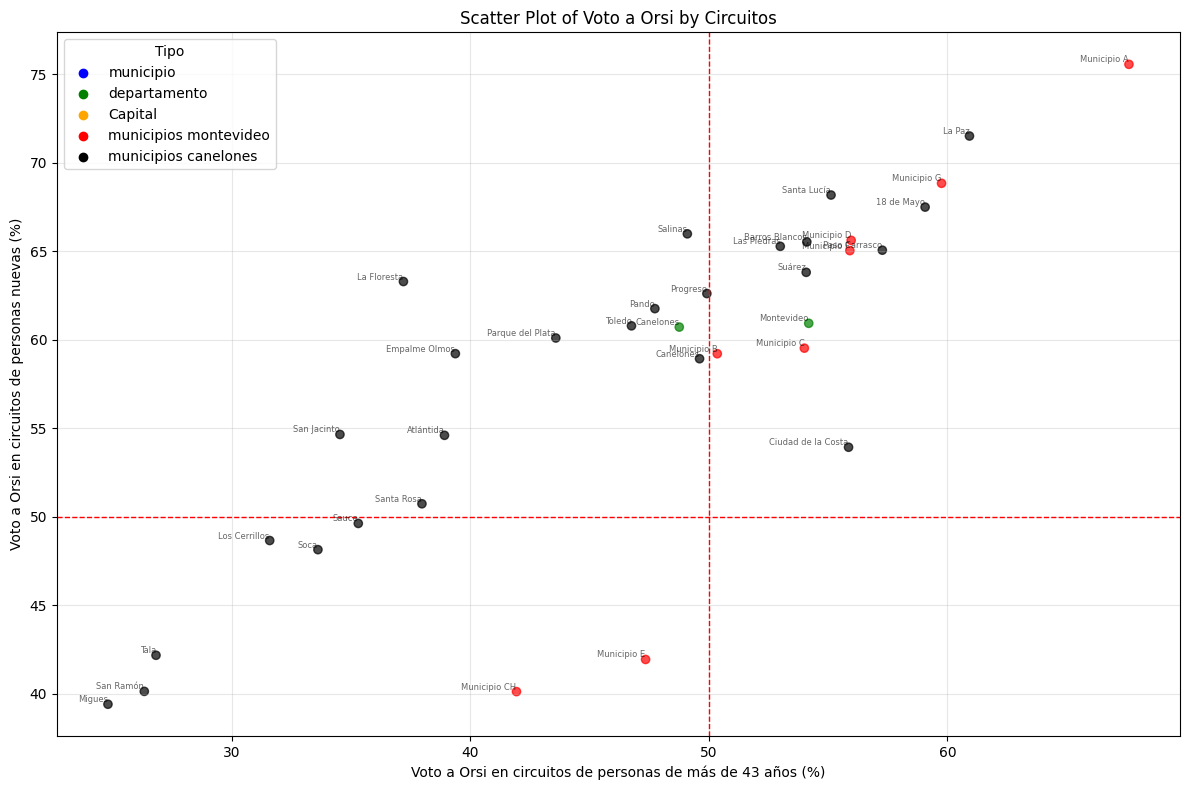

In [23]:
df = df_to_graph_3

# Use a specific color map for the 'tipo' variable
tipo_colors = {"municipio": "blue", "departamento": "green", "Capital": "orange", 'municipios montevideo': "red", 'municipios canelones': "black"}
df["color"] = df["tipo"].map(tipo_colors)

# Multiply props by 100 to convert to percentages
df["prop_x"] *= 100
df["prop_y"] *= 100

# Set labels for text annotations
df["label"] = df["municipio"].fillna(df["DEPTO"])

# Scatter plot with additional vertical and horizontal lines
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df["prop_x"], df["prop_y"], c=df["color"], alpha=0.7)

# Add text annotations
for i, row in df.iterrows():
    plt.text(row["prop_x"], row["prop_y"], str(row["label"]), fontsize=6, ha='right', va='bottom', alpha=0.6)

# Draw vertical and horizontal lines at 50
plt.axvline(x=50, color='red', linestyle='--', linewidth=1)
plt.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Customize axes
plt.xlabel("Voto a Orsi en circuitos de personas de más de 43 años (%)")
plt.ylabel("Voto a Orsi en circuitos de personas nuevas (%)")
plt.title("Scatter Plot of Voto a Orsi by Circuitos")

# Add a manual legend to match colors with 'tipo'
for tipo, color in tipo_colors.items():
    plt.scatter([], [], color=color, label=tipo)
plt.legend(title="Tipo", loc="best")

# Show plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("output/3.png", dpi=300)

plt.show()


In [24]:
series=series_con_nuevos[(~(series_con_nuevos['1984'].isna())) | (series_con_nuevos['SERIE'].str.startswith('A')) | (series_con_nuevos['SERIE'].str.startswith('B'))]['SERIE'].tolist()

In [25]:
nuevos_mod=circuitos[(circuitos['hay_nuevo']==True) & (circuitos['Serie'].isin(series))]

In [26]:
base=pd.merge(df5, nuevos_mod, on=['SERIE','CIRCUITO'])[['DEPTO','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
base_deptos=base.groupby('DEPTO').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
deptos_nuevos_mod=base_deptos.sort_values(by='prop')

In [27]:
primeros_mod=circuitos.groupby('SERIE').first()[['LOCALIDAD','CIRCUITO', 'Serie', 'hay_nuevo_serie']]
primeros_mod=primeros_mod[(primeros_mod['hay_nuevo_serie']==True) & ( primeros_mod['Serie'].isin(series))]

In [28]:
base=pd.merge(df5, primeros_mod, on=['SERIE','CIRCUITO'])[['DEPTO','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
base_deptos=base.groupby('DEPTO').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
deptos_viejos_mod=base_deptos.sort_values(by='prop')

In [29]:
df11=pd.merge(df5, nuevos_mod, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)

df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']


base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_nuevos_mod=base_deptos.sort_values(by='prop')

C:\Users\guill\AppData\Local\Temp\ipykernel_48464\3538151175.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


In [30]:
df11=pd.merge(df5, primeros_mod, on=['SERIE','CIRCUITO'])[['LOCALIDAD','Serie','Yamandú Orsi - Carolina Cosse', 'Álvaro Delgado - Valeria Ripoll']]
df11['municipio'] = df11['Serie'].apply(assign_municipio)

df11['ciudad'] = df11['LOCALIDAD'].apply(assign_capital)
df11.loc[df11['municipio']=='Unknown', 'municipio']=df11['ciudad']


base_deptos=df11.groupby('municipio').sum()
base_deptos['prop']=base_deptos['Yamandú Orsi - Carolina Cosse']/(base_deptos['Yamandú Orsi - Carolina Cosse']+base_deptos['Álvaro Delgado - Valeria Ripoll'])
muni_primeros_mod=base_deptos.sort_values(by='prop')


C:\Users\guill\AppData\Local\Temp\ipykernel_48464\471625131.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_deptos=df11.groupby('municipio').sum()


In [31]:
munis_to_graph=pd.merge(muni_primeros_mod, muni_nuevos_mod, on='municipio').reset_index()
munis_to_graph['tipo']='municipio'
munis_to_graph.loc[munis_to_graph['municipio'].isin(municipios_canelones), 'tipo']='municipios canelones'
munis_to_graph.loc[munis_to_graph['municipio'].isin(municipios_montevideo), 'tipo']='municipios montevideo'

munis_to_graph.loc[munis_to_graph['municipio'].isin(capitales_departamentales), 'tipo']='Capital'
deptos_to_graph=pd.merge(deptos_viejos_mod, deptos_nuevos_mod, on='DEPTO').reset_index()
deptos_to_graph['tipo']='departamento'
df_to_graph_4=pd.concat([munis_to_graph,deptos_to_graph])

# New voters vs. Oldest voters of the series 

### Only keeping those series that existed in 1984

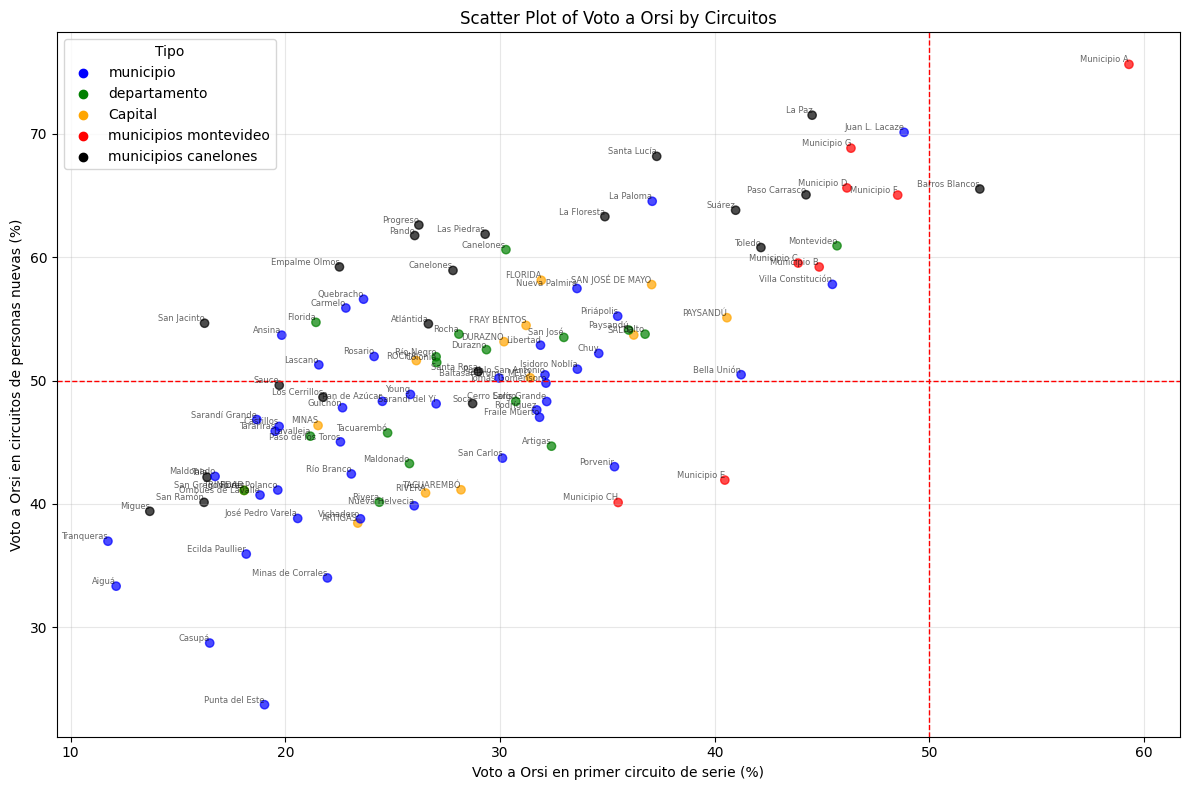

In [32]:
df = df_to_graph_4

# Use a specific color map for the 'tipo' variable
tipo_colors = {"municipio": "blue", "departamento": "green", "Capital": "orange", 'municipios montevideo': "red", 'municipios canelones': "black"}
df["color"] = df["tipo"].map(tipo_colors)

# Multiply props by 100 to convert to percentages
df["prop_x"] *= 100
df["prop_y"] *= 100

# Set labels for text annotations
df["label"] = df["municipio"].fillna(df["DEPTO"])

# Scatter plot with additional vertical and horizontal lines
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df["prop_x"], df["prop_y"], c=df["color"], alpha=0.7)

# Add text annotations
for i, row in df.iterrows():
    plt.text(row["prop_x"], row["prop_y"], str(row["label"]), fontsize=6, ha='right', va='bottom', alpha=0.6)

# Draw vertical and horizontal lines at 50
plt.axvline(x=50, color='red', linestyle='--', linewidth=1)
plt.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Customize axes
plt.xlabel("Voto a Orsi en primer circuito de serie (%)")
plt.ylabel("Voto a Orsi en circuitos de personas nuevas (%)")
plt.title("Scatter Plot of Voto a Orsi by Circuitos")

# Add a manual legend to match colors with 'tipo'
for tipo, color in tipo_colors.items():
    plt.scatter([], [], color=color, label=tipo)
plt.legend(title="Tipo", loc="best")

# Show plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("output/4.png", dpi=300)

plt.show()
